# **Загрузка**

In [1]:
import pandas as pd
import numpy as np
import datetime

%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.dpi'] = 120 #resolution
matplotlib.rcParams['figure.figsize'] = (8,6) #figure size
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
color = sns.color_palette()


In [2]:
from tabulate import tabulate

Датасет - https://www.kaggle.com/competitions/instacart-market-basket-analysis/data

Набор данных состоит из информации о 3,4 миллионах продуктовых заказов, распределенных по 6 CSV-файлам.

In [3]:
aisles = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Иннополис/Итоговый проект/Market Analysis/aisles.csv')
departments = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Иннополис/Итоговый проект/Market Analysis/departments.csv')

order_products_prior = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Иннополис/Итоговый проект/Market Analysis/order_products__prior.csv')
order_products_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Иннополис/Итоговый проект/Market Analysis/order_products__train.csv')

orders = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Иннополис/Итоговый проект/Market Analysis/orders.csv')
products = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Иннополис/Итоговый проект/Market Analysis/products.csv')

# **Описание данных**

### *orders(3,4 млн строк, 206'209 пользователей):*

`order_id`: идентификатор заказа

`user_id`: идентификатор клиента

`eval_set`: к какому набору оценок принадлежит этот порядок

`order_number`: порядковый номер заказа для этого пользователя

`order_dow`: день недели, когда был размещен заказ.

`order_hour_of_day`: час дня, когда был размещен заказ

`days_since_prior`: количество дней с момента последнего заказа, ограничено 30 (NaN для order_number= 1)

In [4]:
orders.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


<Axes: >

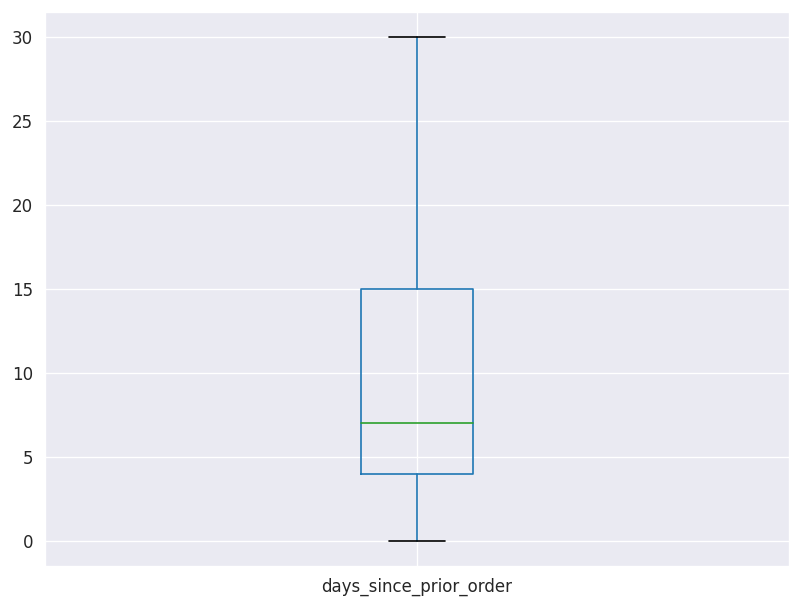

In [5]:
orders.boxplot('days_since_prior_order')

In [ ]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


Этот файл дает список всех заказов, которые у нас есть в наборе данных. 1 строка на заказ. Например, мы видим, что у пользователя 1 есть 11 заказов, 1 из которых находится в наборе для обучения, а 10 из которых являются предыдущими заказами.
не сообщается о том, какие продукты были заказаны. Это содержится в order_products.csv

### *products(~50 тыс. строк):*

`product_id`: идентификатор продукта

`product_name`: название продукта

`aisle_id`: внешний ключ

`department_id`: внешний ключ


In [ ]:
products.head(10)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
5,6,Dry Nose Oil,11,11
6,7,Pure Coconut Water With Orange,98,7
7,8,Cut Russet Potatoes Steam N' Mash,116,1
8,9,Light Strawberry Blueberry Yogurt,120,16
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7


In [ ]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


### *order_products__`SET`(3 м+ рядов):*

`order_id`: внешний ключ

`product_id`: внешний ключ

`add_to_cart_order`: порядок добавления каждого товара в корзину.

`reordered`: 1, если этот товар уже был заказан этим пользователем в прошлом, 0 в противном случае.



где `SET` — один из четырех следующих наборов оценок (eval_set):

* "**prior**": заказы, предшествующие последнему заказу пользователя (~3,2 млн заказов).

* "**train**": данные обучения предоставляются участникам (131'209  заказов)

* "**test**": тестовые данные зарезервированы для соревнований по машинному обучению (~75 тыс. заказов)





In [ ]:
order_products_train.head(11)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


In [ ]:
order_products_prior.head(11)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0
9,3,33754,1,1


Этот файл дает нам информацию о том, какие продукты (product_id) были заказаны. Он также содержит информацию о заказе (add_to_cart_order), в котором товары были помещены в корзину, и информацию о том, является ли этот продукт повторным или нет.

Например, видно, что order_id = 1 было 8 продуктов, 4 из которых являются повторными заказами.

Тем не менее, мы не знаем, что это за продукты. Эта информация есть в products.csv

In [ ]:
order_products = order_products_prior.append(order_products_train)

<ipython-input-10-fa50d5924735>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  order_products = order_products_prior.append(order_products_train)


### *aisles(134 ряда): Названия рядов в магазинах(полок)*

`aisle_id`: идентификатор прохода

`aisle`: название прохода



In [ ]:
aisles.head(10)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
5,6,other
6,7,packaged meat
7,8,bakery desserts
8,9,pasta sauce
9,10,kitchen supplies


### *deptartments(21 ряд):*

`department_id`: идентификатор отдела

`department`: название отдела


In [ ]:
departments.head(10)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


Посмотрим на распределение наборов

In [ ]:
def get_unique_count(x):
    return len(np.unique(x))

orders.groupby("eval_set")["user_id"].aggregate(get_unique_count)

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

 **206'209 - клиентов. Из них последняя покупка у 131 209 клиентов дана как набор для обучения, и нам нужно спрогнозировать для остальных 75 000 клиентов.**

# **Анализ**

## **Обзор Заказов Клиентов**

### Частота общего количества заказов клиентов

In [ ]:
order_number = orders.groupby('user_id')['order_number'].max()
order_number = order_number.value_counts()

In [ ]:
order_number[100]

1374

Text(0.5, 1.0, 'Частота общего количества заказов клиентов')

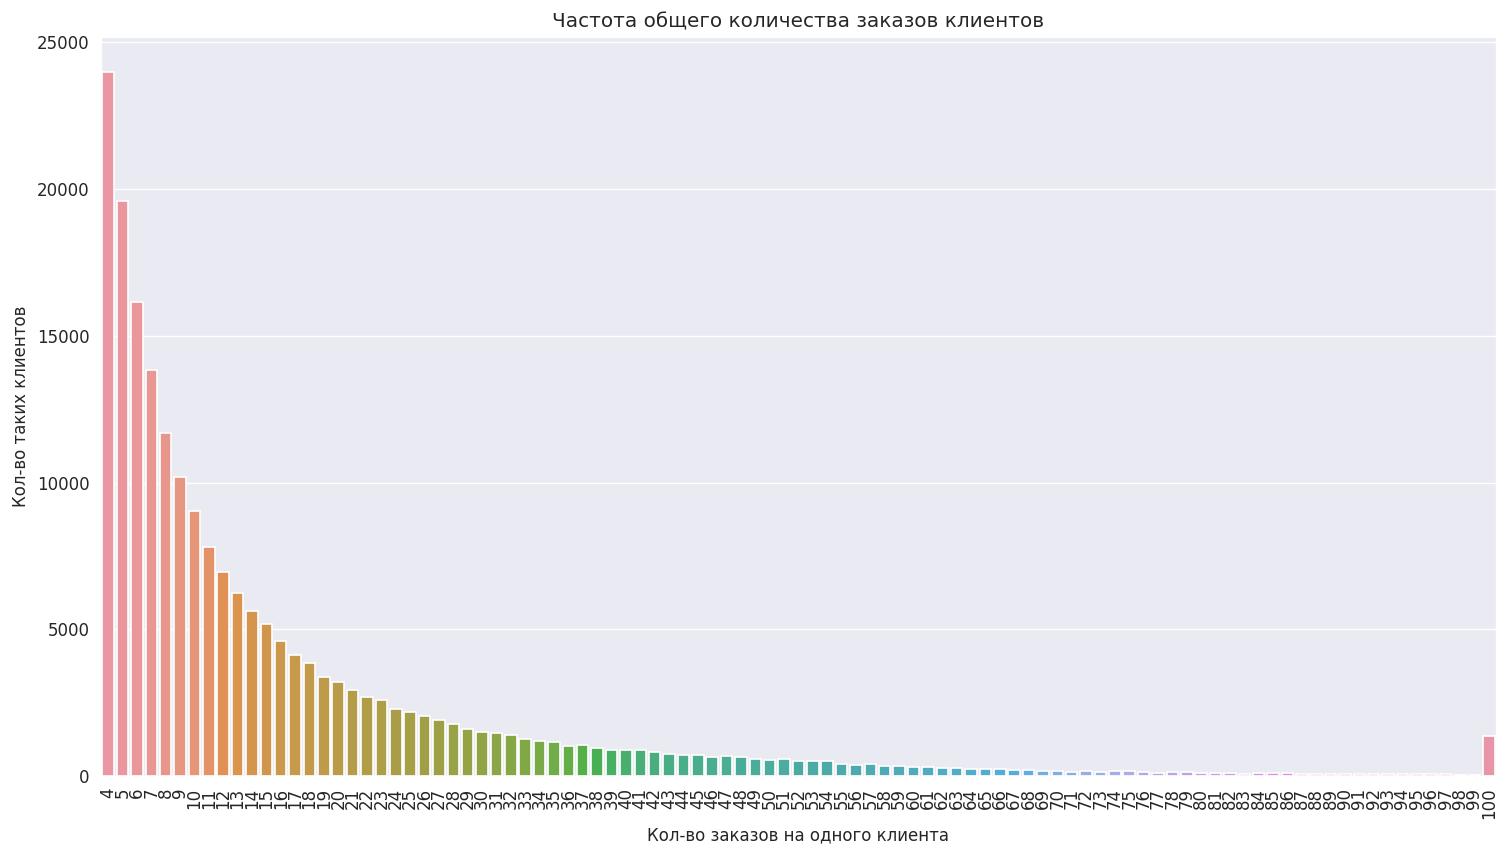

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x = order_number.index, y = order_number.values)
ax.set_xlabel('Кол-во заказов на одного клиента')
ax.set_ylabel('Кол-во таких клиентов')
ax.xaxis.set_tick_params(rotation=90, labelsize=10)
ax.set_title('Частота общего количества заказов клиентов')

от 4 до 100 заказов на одного клиента

### Доля повторных заказов

In [ ]:
tmp = order_products.groupby('reordered').size().reset_index(name='count') # Группировка и подсчет количества для каждого значения 'reordered'
tmp['reordered'] = tmp['reordered'].astype('category')

# Вычисление пропорции
tmp['proportion'] = tmp['count'] / tmp['count'].sum()

# Вывод таблицы
print(tabulate(tmp, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═════════════╤═════════════╤══════════════╕
│   reordered │       count │   proportion │
╞═════════════╪═════════════╪══════════════╡
│           0 │ 1.38637e+07 │     0.409938 │
├─────────────┼─────────────┼──────────────┤
│           1 │ 1.99554e+07 │     0.590062 │
╘═════════════╧═════════════╧══════════════╛


**60% приходится на повторные заказы**

Text(0.5, 1.0, 'Количество повторных заказов')

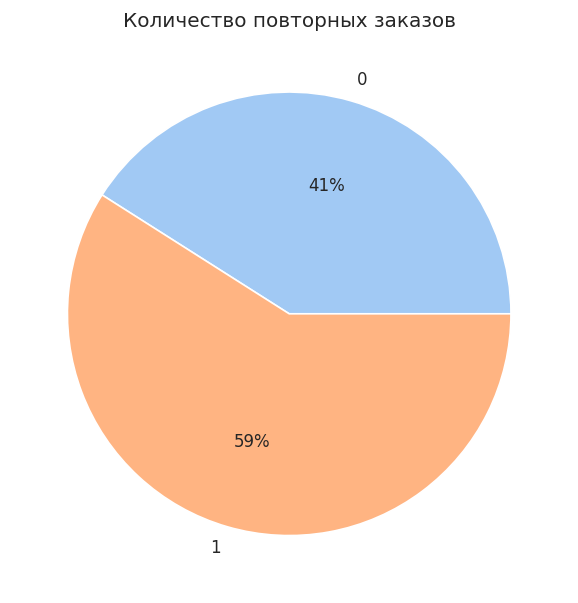

In [ ]:
colors = sns.color_palette('pastel')[ 0:5 ]

#create pie chart
plt.pie(tmp['proportion'], labels = tmp['reordered'], colors = colors, autopct='%.0f%%')
plt.title('Количество повторных заказов')

##  **Анализ Времени Заказов**

### Частота заказов по дням недели

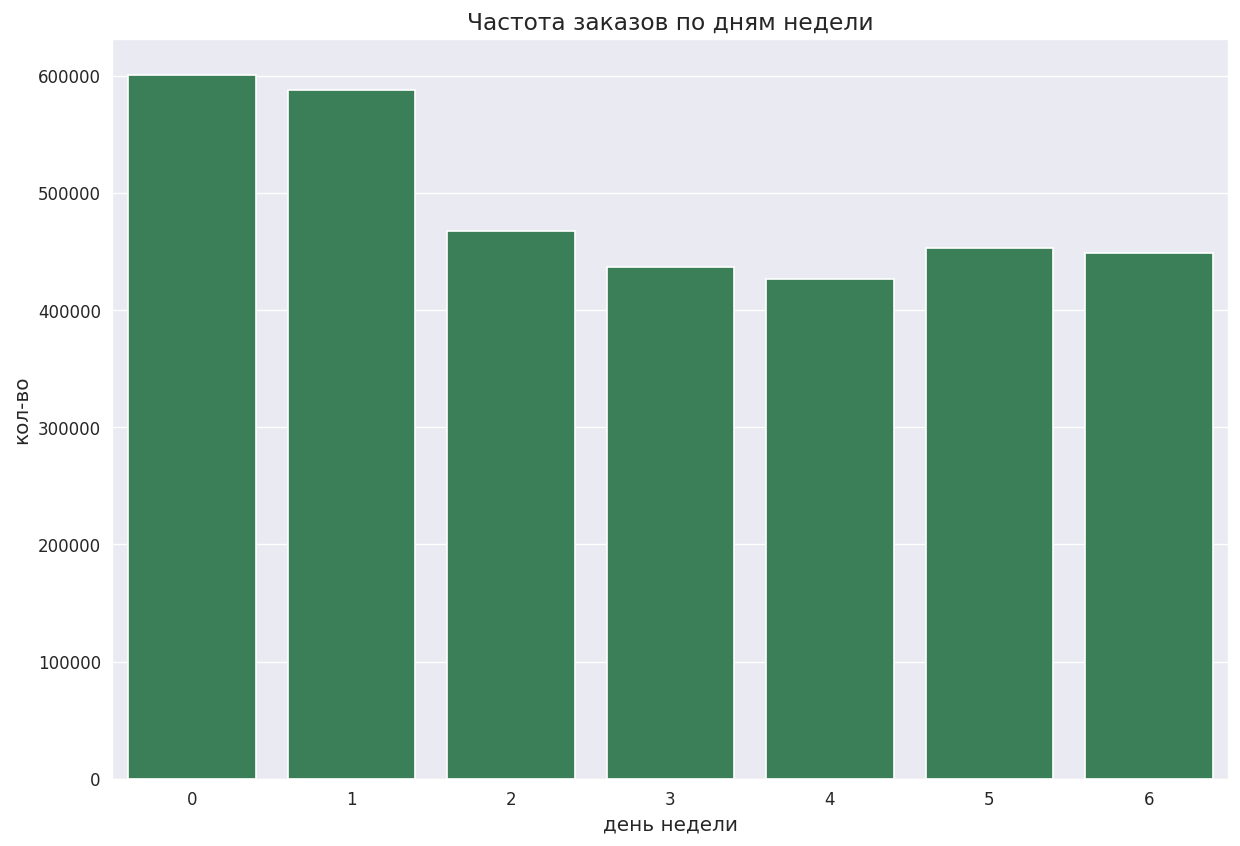

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x=orders["order_dow"], data=orders, color = 'seagreen')
plt.ylabel('кол-во', fontsize = 12)
plt.xlabel('день недели', fontsize = 12)
plt.title("Частота заказов по дням недели", fontsize = 14)
plt.show()

Наиболее часто заказывают в день 0 и 1. К сожалению, нет информации о том, какие значения представляют какой день, но можно предположить, что это выходные.

### Всего уникальных пользователей за день недели

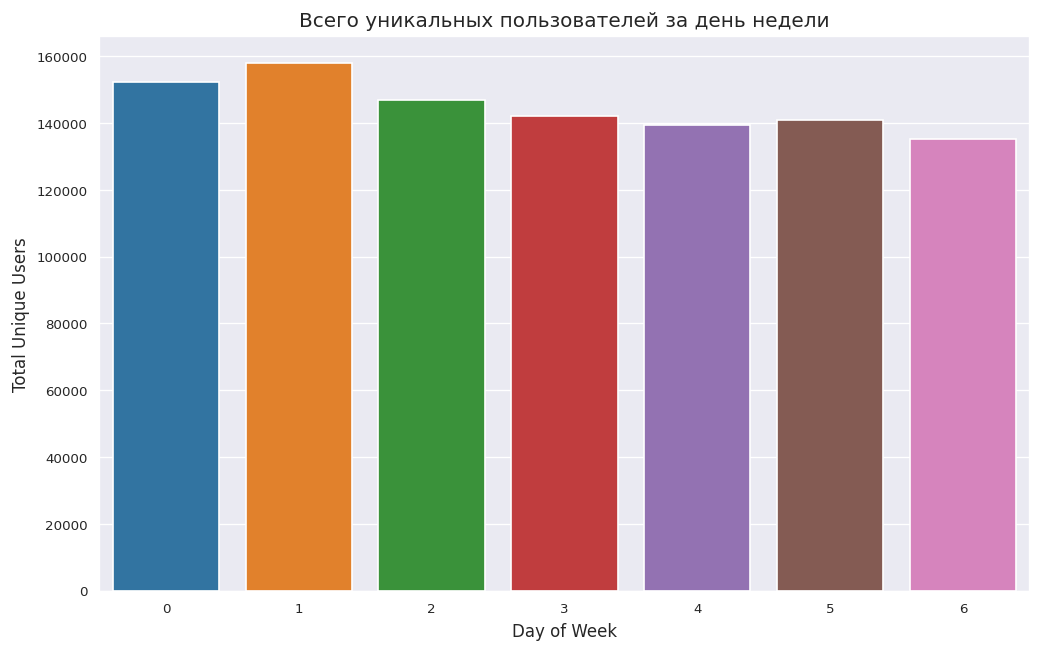

In [ ]:
temp_df = orders.groupby('order_dow')['user_id'].nunique()

fig, ax = plt.subplots(figsize = (10,6))
ax = sns.barplot(x = temp_df.index, y = temp_df.values)
ax.set_xlabel('Day of Week', size = 10)
ax.set_ylabel('Total Unique Users', size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
ax.set_title('Всего уникальных пользователей за день недели')
plt.show()

1 - самый посещаемый день

### Распределение заказов по часам

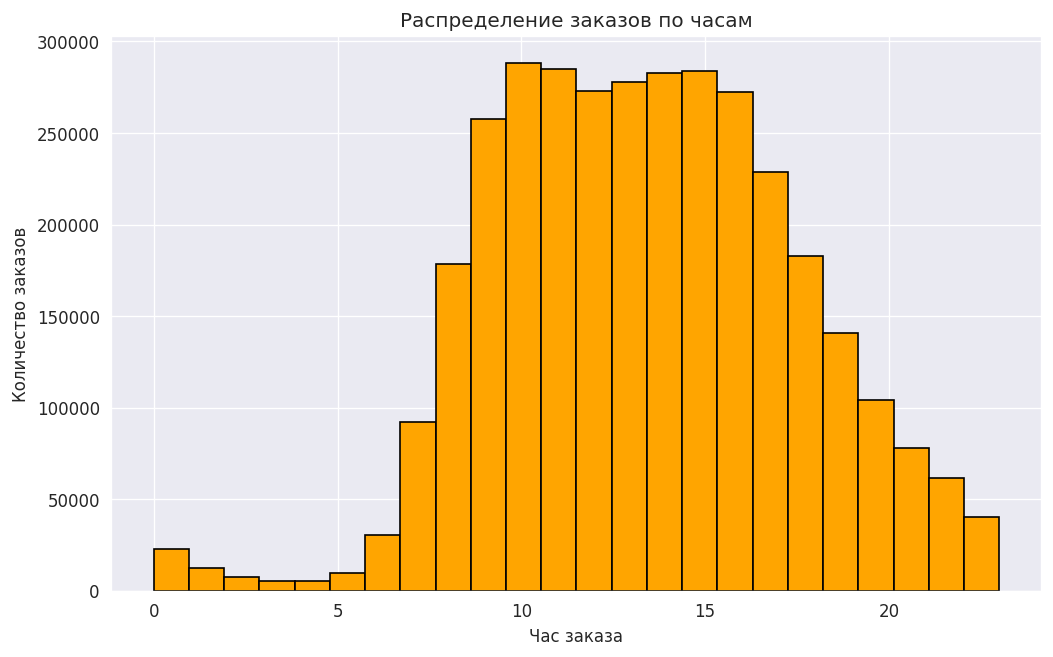

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(orders['order_hour_of_day'], bins=24, color='orange', edgecolor='black')
plt.xlabel('Час заказа')
plt.ylabel('Количество заказов')
plt.title('Распределение заказов по часам')
plt.show()

Большинство заказов с 8.00 до 18.00

### Распределение заказов по дням с момента предыдущего заказа

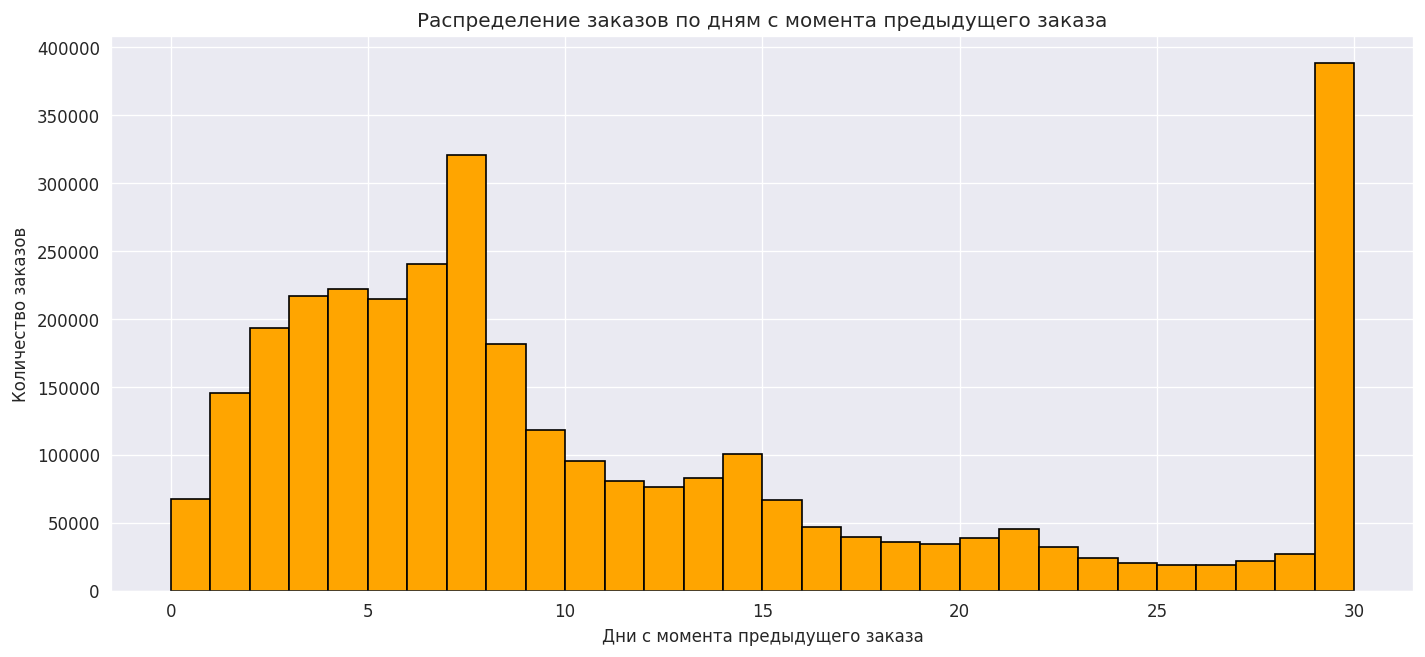

In [ ]:
plt.figure(figsize=(14, 6))
plt.hist(orders['days_since_prior_order'], bins=30, color='orange', edgecolor='black')
plt.xlabel('Дни с момента предыдущего заказа')
plt.ylabel('Количество заказов')
plt.title('Распределение заказов по дням с момента предыдущего заказа')
plt.show()

люди заказывают чаще примерно через 1 неделю

подтверждается пиками в 7, 14, 21 и 30 на графике

## **Анализ проходов и отделов**


In [ ]:
merged_data = pd.merge(order_products, products, on='product_id')
merged_data = pd.merge(merged_data, aisles, on='aisle_id')

In [ ]:
merged_data

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,eggs
3,327,33120,5,1,Organic Egg Whites,86,16,eggs
4,390,33120,28,1,Organic Egg Whites,86,16,eggs
...,...,...,...,...,...,...,...,...
33819101,2020661,29951,7,1,Ruby Port Wine,134,5,specialty wines champagnes
33819102,2736620,29951,2,0,Ruby Port Wine,134,5,specialty wines champagnes
33819103,3259311,29951,2,0,Ruby Port Wine,134,5,specialty wines champagnes
33819104,2024441,29951,6,0,Ruby Port Wine,134,5,specialty wines champagnes


### Всего заказов и повторных заказов из самых популярных проходов

In [ ]:
temp_df = merged_data.groupby("aisle")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()

In [ ]:
temp_df

,aisle,total,reorders
0,fresh fruits,3792661,2726251
1,fresh vegetables,3568630,2123540
2,packaged vegetables fruits,1843806,1178700
3,yogurt,1507583,1034957
4,packaged cheese,1021462,598280
...,...,...,...
129,eye ear care,9522,2100
130,baby bath body care,8909,2626
131,baby accessories,8466,4669
132,beauty,6455,1374


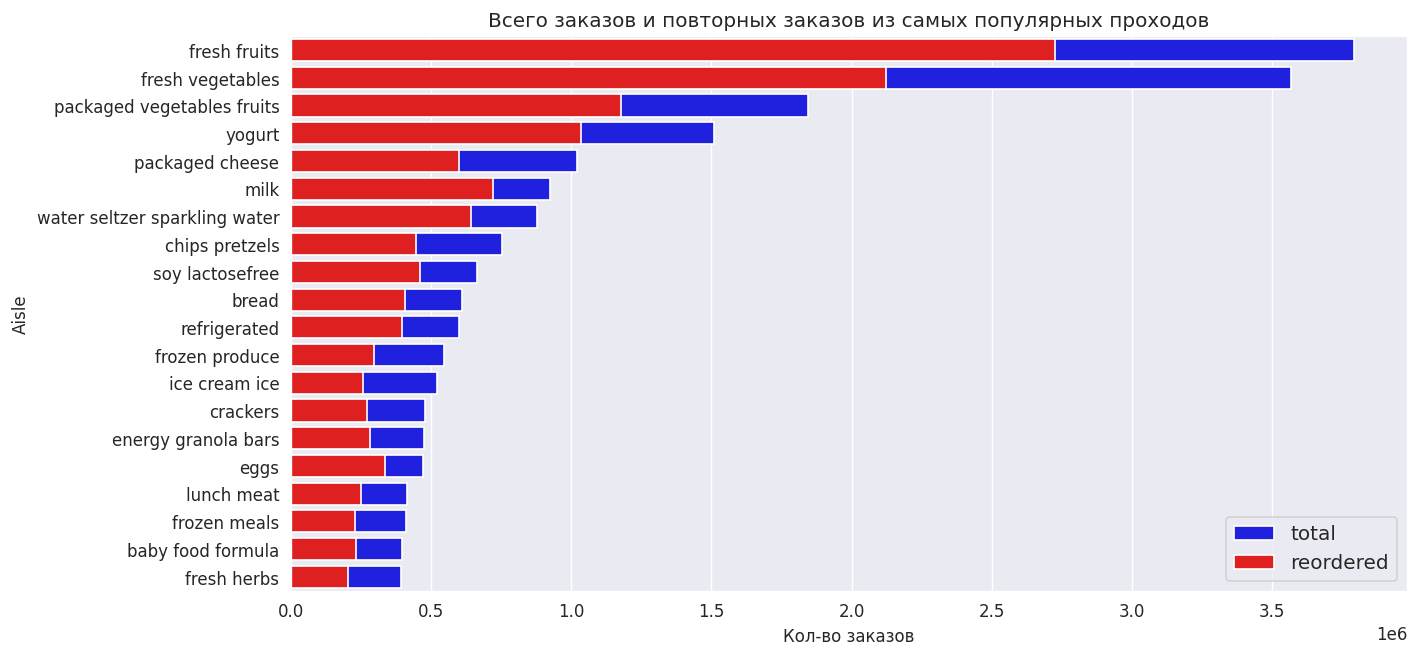

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.total[0:20], color='blue', label = "total")
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.reorders[0:20], color='red', label = "reordered")
ax.set_ylabel("Aisle")
ax.set_xlabel("Кол-во заказов")
ax.set_title("Всего заказов и повторных заказов из самых популярных проходов")
ax.legend(loc = 4, prop={'size': 12})
plt.show()

### 20 проходов с самым высоким коэффициентом повторного заказа

In [ ]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df = temp_df.sort_values("reorder_ratio", ascending=False).reset_index()

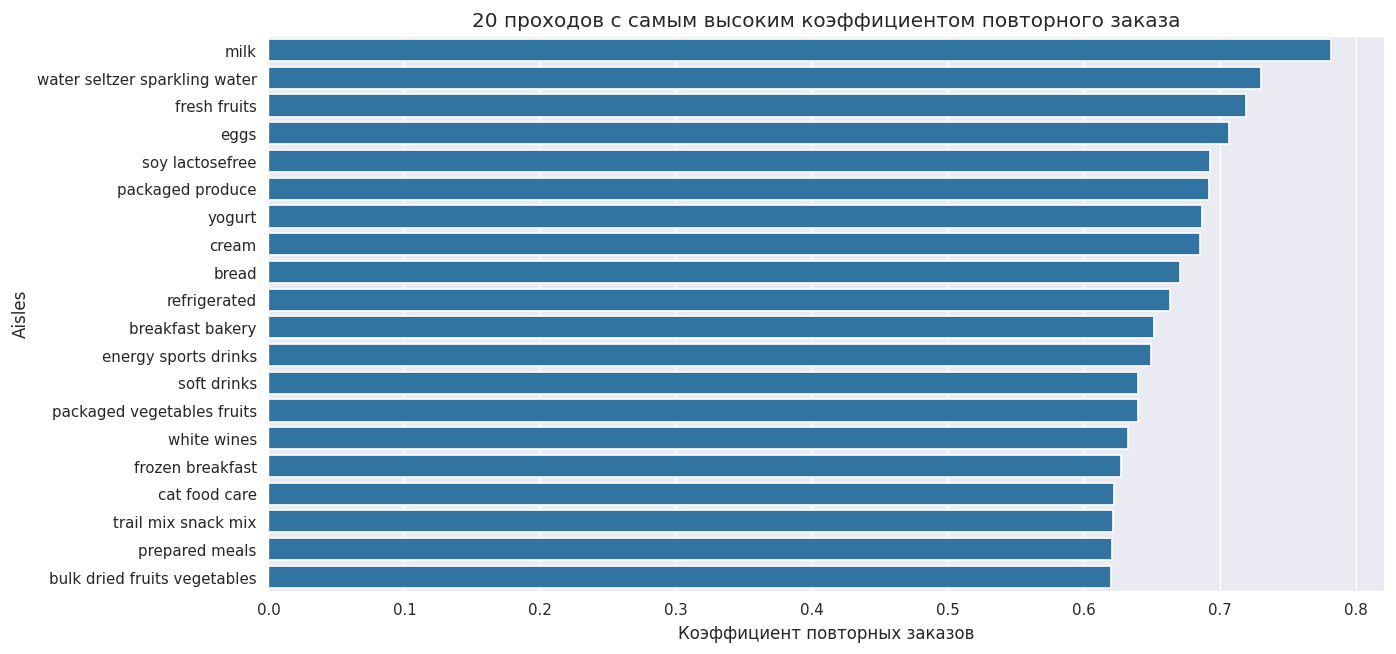

In [ ]:
fig, ax = plt.subplots(figsize = (12,6))
ax = sns.barplot(y = temp_df.aisle[0:20], x = temp_df.reorder_ratio[0:20], color=color[0])
ax.set_ylabel("Aisles")
ax.set_xlabel("Коэффициент повторных заказов")
ax.set_title("20 проходов с самым высоким коэффициентом повторного заказа")
ax.tick_params(axis = 'both', labelsize = 9)
plt.show()

### 20 проходов с самым низким коэффициентом повторного заказа

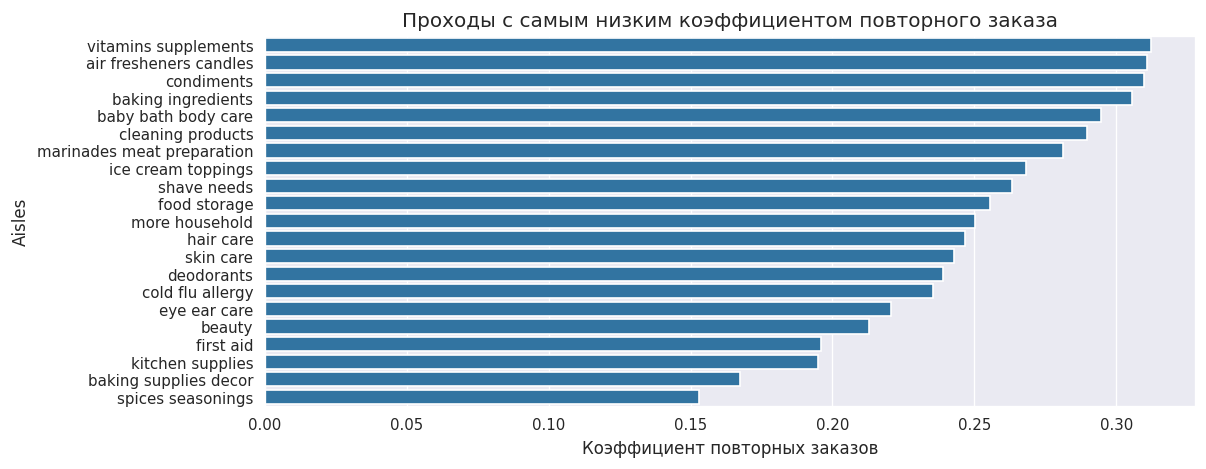

In [ ]:
fig, ax = plt.subplots(figsize = (10,4))
ax = sns.barplot(y = temp_df.aisle[-21:], x = temp_df.reorder_ratio[-21:], color=color[0])
ax.set_ylabel("Aisles")
ax.set_xlabel("Коэффициент повторных заказов")
ax.set_title("Проходы с самым низким коэффициентом повторного заказа")
ax.tick_params(axis = 'both', labelsize = 9)
plt.show()

## **Популярные Товары и Повторные заказы**


### Популярные товаров

In [ ]:
grouped = order_products.groupby('product_id').size().reset_index(name='count')
# Выбор 10 наиболее популярных товаров
top_10 = grouped.nlargest(10, 'count')

# Присоединение информации о товарах из DataFrame products
top_10 = top_10.merge(products[['product_id', 'product_name']], on='product_id')

# Сортировка по убыванию количества
top_10 = top_10.sort_values(by='count', ascending=False)

# Вывод таблицы
print(tabulate(top_10, headers='keys', tablefmt='pretty'))

+---+------------+--------+------------------------+
|   | product_id | count  |      product_name      |
+---+------------+--------+------------------------+
| 0 |   24852    | 491291 |         Banana         |
| 1 |   13176    | 394930 | Bag of Organic Bananas |
| 2 |   21137    | 275577 |  Organic Strawberries  |
| 3 |   21903    | 251705 |  Organic Baby Spinach  |
| 4 |   47209    | 220877 |  Organic Hass Avocado  |
| 5 |   47766    | 184224 |    Organic Avocado     |
| 6 |   47626    | 160792 |      Large Lemon       |
| 7 |   16797    | 149445 |      Strawberries      |
| 8 |   26209    | 146660 |         Limes          |
| 9 |   27845    | 142813 |   Organic Whole Milk   |
+---+------------+--------+------------------------+


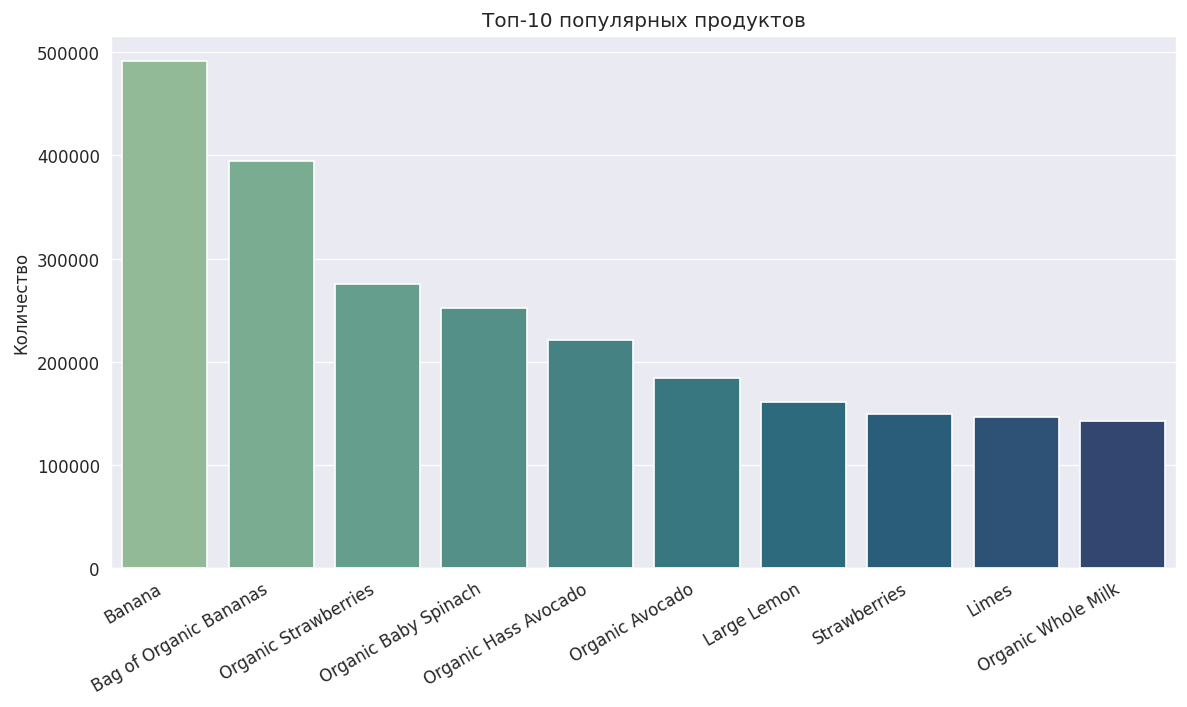

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='product_name', y='count', data=top_10, palette='crest')
plt.xticks(rotation=30, ha='right')
plt.xlabel('')
plt.ylabel('Количество')
plt.title('Топ-10 популярных продуктов')
plt.tight_layout()
plt.show()

### Есть ли продукты, которые имеют наибольшую вероятность повторного заказа?

In [ ]:
# Группировка и вычисление средней пропорции reordered для каждого продукта
tmp = order_products.groupby('product_id').agg(
    proportion_reordered=('reordered', 'mean'),
    n=('reordered', 'size')
).reset_index()


tmp = tmp[tmp['n'] > 40]

# Выбор топ-10 продуктов с наивысшей пропорцией reordered
tmp = tmp.nlargest(10, 'proportion_reordered')
tmp = tmp.merge(products[['product_id', 'product_name']], on='product_id')
tmp = tmp.sort_values(by='proportion_reordered', ascending=False)


print(tabulate(tmp, headers='keys', tablefmt='fancy_grid', showindex=False))

╒══════════════╤════════════════════════╤═════╤══════════════════════════════════════════╕
│   product_id │   proportion_reordered │   n │ product_name                             │
╞══════════════╪════════════════════════╪═════╪══════════════════════════════════════════╡
│         6433 │               0.942029 │  69 │ Raw Veggie Wrappers                      │
├──────────────┼────────────────────────┼─────┼──────────────────────────────────────────┤
│         2075 │               0.933333 │  90 │ Serenity Ultimate Extrema Overnight Pads │
├──────────────┼────────────────────────┼─────┼──────────────────────────────────────────┤
│        27740 │               0.921569 │ 102 │ Chocolate Love Bar                       │
├──────────────┼────────────────────────┼─────┼──────────────────────────────────────────┤
│        13875 │               0.911111 │  45 │ Simply Sleep Nighttime Sleep Aid         │
├──────────────┼────────────────────────┼─────┼──────────────────────────────────────────┤

### Топ-10 продуктов с наивысшей пропорцией Reordered

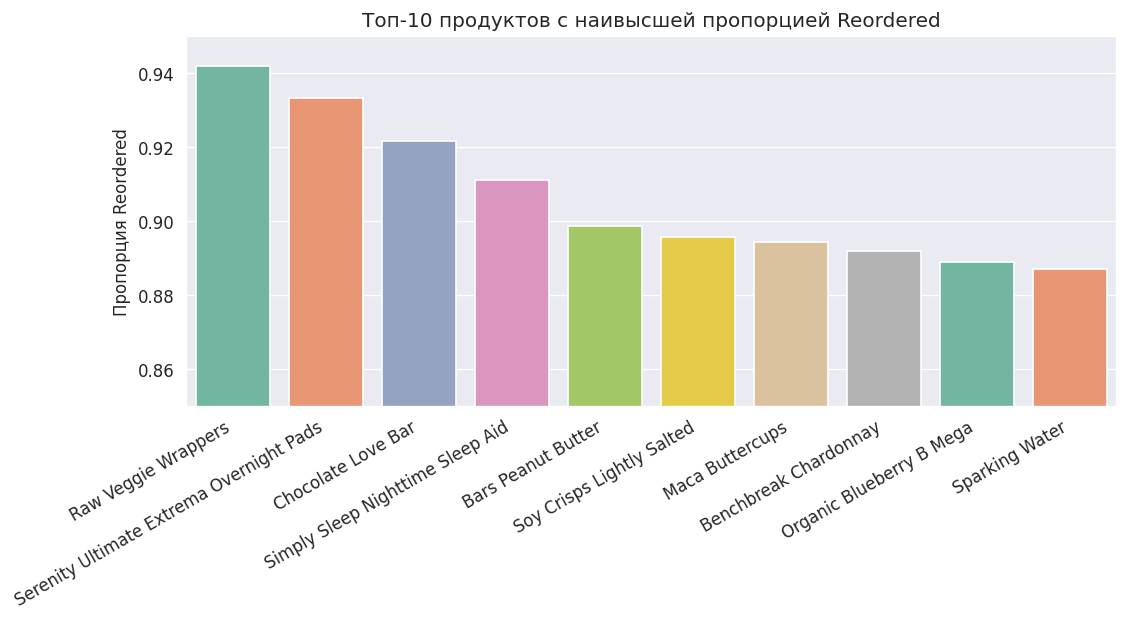

In [ ]:
plt.figure(figsize=(10, 4))
sns.barplot(x='product_name', y='proportion_reordered', data=tmp, palette='Set2')
plt.xticks(rotation=30, ha='right')
plt.xlabel('')
plt.ylabel('Пропорция Reordered')
plt.title('Топ-10 продуктов с наивысшей пропорцией Reordered')
plt.ylim(0.85, 0.95)  # Установка ограничения по оси y
plt.show()

## **Поведение Пользователей при Оформлении Заказа**

### Связь дня недели и часа дня. В какой момент заказов больше?


In [ ]:
temp_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
temp_df = temp_df.pivot('order_dow', 'order_hour_of_day', 'order_number')
temp_df.head()

<ipython-input-35-cd6c1c528e34>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  temp_df = temp_df.pivot('order_dow', 'order_hour_of_day', 'order_number')


order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645


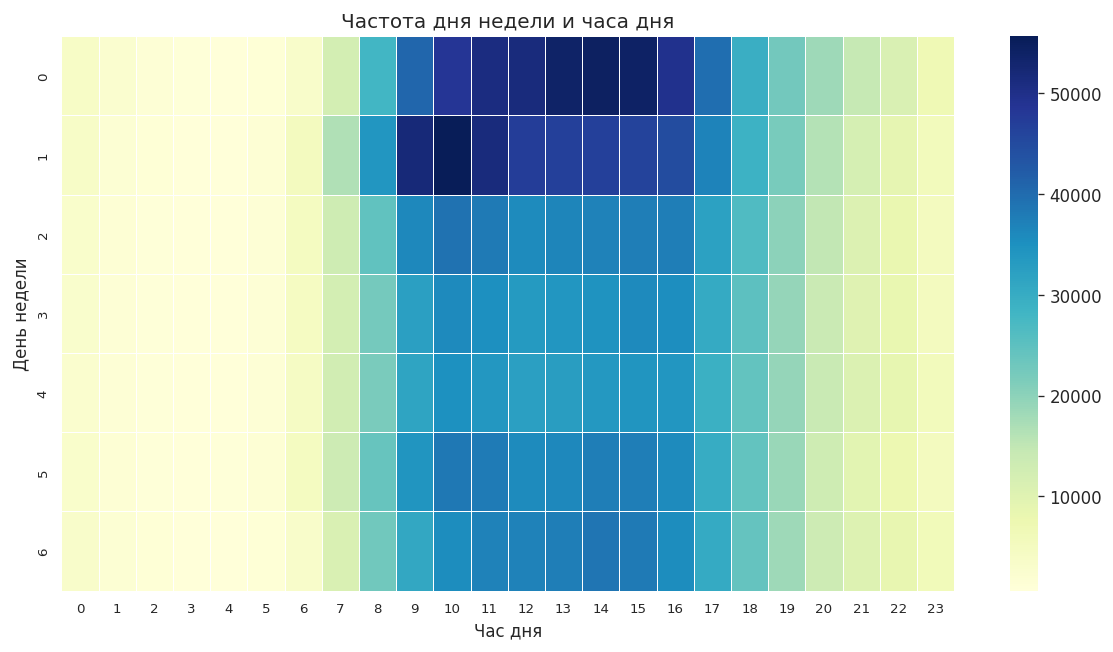

In [ ]:
ax = plt.subplots(figsize=(12,6))
ax = sns.heatmap(temp_df, cmap="YlGnBu", linewidths=.5)
ax.set_title("Частота дня недели и часа дня", size = 12)
ax.set_xlabel("Час дня", size = 10)
ax.set_ylabel("День недели", size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
fig = ax.get_figure()

plt.show()

вторая половина дня в субботу и утро воскресенья - лучшее время для заказов.

### Какой товар люди кладут в корзину в первую очередь?

In [ ]:
# Группировка и вычисление количества продуктов, добавленных в корзину на первом месте
tmp = order_products.groupby(['product_id', 'add_to_cart_order']).size().reset_index(name='count')
tmp['pct'] = tmp['count'] / tmp.groupby('product_id')['count'].transform('sum')

# Фильтрация продуктов, добавленных на первое место и с количеством больше 10
tmp = tmp[(tmp['add_to_cart_order'] == 1) & (tmp['count'] > 10)]
tmp = tmp.merge(products[['product_id', 'product_name']], on='product_id')

# Выбор топ-10 продуктов с наивысшим процентом
tmp = tmp.nlargest(10, 'pct')
tmp = tmp[['product_name', 'pct', 'count']]

print(tabulate(tmp, headers='keys', tablefmt='fancy_grid', showindex=False))

╒═══════════════════════════════════════════════════════╤══════════╤═════════╕
│ product_name                                          │      pct │   count │
╞═══════════════════════════════════════════════════════╪══════════╪═════════╡
│ Emergency Contraceptive                               │ 0.792453 │      42 │
├───────────────────────────────────────────────────────┼──────────┼─────────┤
│ Rehab Energy Iced Tea Orangeade                       │ 0.787879 │      52 │
├───────────────────────────────────────────────────────┼──────────┼─────────┤
│ California Champagne                                  │ 0.777778 │      14 │
├───────────────────────────────────────────────────────┼──────────┼─────────┤
│ Flavored Vodka, Peach                                 │ 0.708333 │      51 │
├───────────────────────────────────────────────────────┼──────────┼─────────┤
│ Cabernet Sauvignon, H3 Collection, Horse Heaven Hills │ 0.7      │      14 │
├───────────────────────────────────────────────────

### Частота появления товаров в корзине

In [ ]:
add_to_cart_order = order_products.groupby('order_id')['add_to_cart_order'].count()
add_to_cart_order = add_to_cart_order.value_counts()

Text(0.5, 1.0, 'Частота появления товаров в корзине')

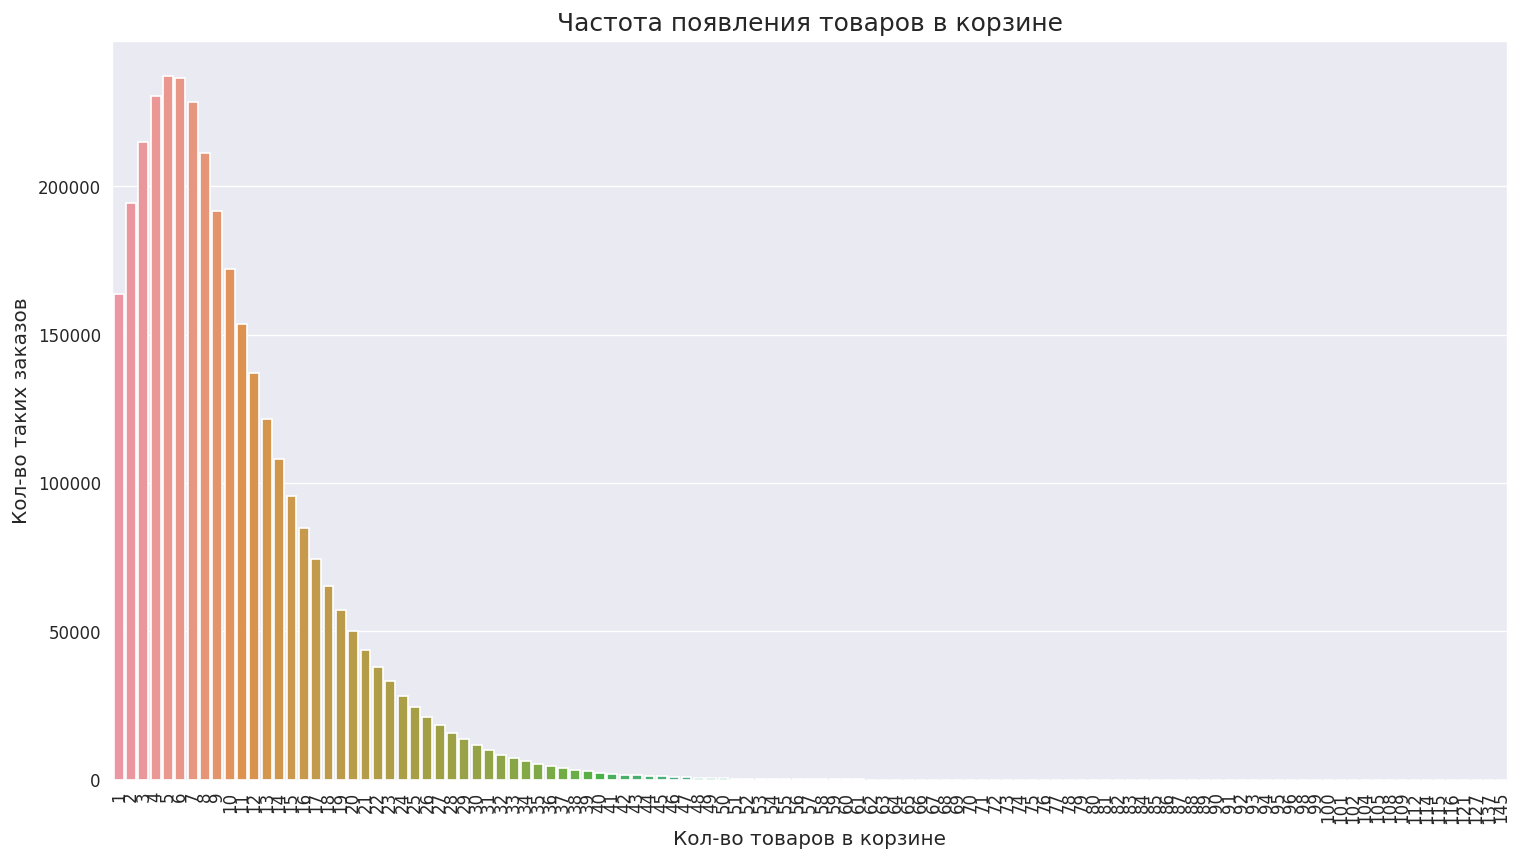

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(x = add_to_cart_order.index, y = add_to_cart_order.values)
ax.set_xlabel('Кол-во товаров в корзине', fontsize = 12)
ax.set_ylabel('Кол-во таких заказов', fontsize = 12)
ax.xaxis.set_tick_params(rotation=90, labelsize = 10)
ax.set_title('Частота появления товаров в корзине', size = 15)

большинство людей покупают от 1 до 15 товаров в заказе. 5 товаров в корзине чаще всего

диапазон от 1 до 145

## Совокупная сумма уникальных пользователей по продукту

In [ ]:
merged_data = pd.merge(merged_data, orders[['order_id', 'user_id','order_dow']], on='order_id')

In [ ]:
merged_data

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,user_id,order_dow
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,202279,5
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,202279,5
2,2,17794,6,1,Carrots,83,4,fresh vegetables,202279,5
3,2,9327,3,0,Garlic Powder,104,13,spices seasonings,202279,5
4,2,45918,4,1,Coconut Butter,19,13,oils vinegars,202279,5
...,...,...,...,...,...,...,...,...,...,...
33819101,3243156,20731,1,0,Straight Sherry,134,5,specialty wines champagnes,166400,1
33819102,860862,30582,1,0,Natural Champagne,134,5,specialty wines champagnes,104017,5
33819103,1333472,27906,1,0,Imperial Champagne,134,5,specialty wines champagnes,62079,3
33819104,2122701,26086,1,1,La Grand Dame Brut Champagne,134,5,specialty wines champagnes,77799,3


In [ ]:
product_unique_users = merged_data.groupby('product_name')['user_id'].nunique().reset_index().rename(columns={'user_id':'total_users'})
product_unique_users.sort_values('total_users', ascending = False).head(10)

,product_name,total_users
3677,Banana,76125
3472,Bag of Organic Bananas,65655
31923,Organic Strawberries,61129
28843,Organic Baby Spinach,56766
22415,Large Lemon,48614
23422,Limes,46658
42908,Strawberries,44857
30300,Organic Hass Avocado,44704
28807,Organic Avocado,43954
29011,Organic Blueberries,38720


In [ ]:
temp_df = merged_data.groupby("product_name")["reordered"].agg(['count', 'sum']).rename(columns = {'count':'total','sum':'reorders'})
temp_df = temp_df.sort_values('total', ascending=False).reset_index()

In [ ]:
temp_df["reorder_ratio"] = temp_df.reorders/temp_df.total
temp_df.sort_values("reorder_ratio", ascending=False).head(10)

,product_name,total,reorders,reorder_ratio
23853,Raw Veggie Wrappers,69,65,0.942029
21388,Serenity Ultimate Extrema Overnight Pads,90,84,0.933333
40147,Orange Energy Shots,13,12,0.923077
20296,Chocolate Love Bar,102,94,0.921569
30746,Soy Powder Infant Formula,35,32,0.914286
28078,Simply Sleep Nighttime Sleep Aid,45,41,0.911111
35213,"Energy Shot, Grape Flavor",22,20,0.909091
32316,Russian River Valley Reserve Pinot Noir,30,27,0.900000
23918,Bars Peanut Butter,69,62,0.898551
24218,Soy Crisps Lightly Salted,67,60,0.895522


In [ ]:
product_unique_users

,product_name,total_users
0,#2 Coffee Filters,534
1,#2 Cone White Coffee Filters,11
2,#2 Mechanical Pencils,9
3,#4 Natural Brown Coffee Filters,157
4,& Go! Hazelnut Spread + Pretzel Sticks,81
...,...,...
49680,with Xylitol Unwrapped Original Flavor 50 Stic...,24
49681,with Xylitol Unwrapped Spearmint 50 Sticks Sug...,37
49682,with Xylitol Watermelon Twist 18 Sticks Sugar ...,40
49683,with a Splash of Mango Coconut Water,20


In [ ]:
product_unique_users = product_unique_users.merge(temp_df, on='product_name', how='left')
product_unique_users.sort_values("reorder_ratio", ascending=False).head(20)

,product_name,total_users,total,reorders,reorder_ratio
37379,Raw Veggie Wrappers,4,69,65,0.942029
39870,Serenity Ultimate Extrema Overnight Pads,6,90,84,0.933333
28415,Orange Energy Shots,1,13,12,0.923077
8537,Chocolate Love Bar,8,102,94,0.921569
41723,Soy Powder Infant Formula,3,35,32,0.914286
40458,Simply Sleep Nighttime Sleep Aid,4,45,41,0.911111
13844,"Energy Shot, Grape Flavor",2,22,20,0.909091
38793,Russian River Valley Reserve Pinot Noir,3,30,27,0.900000
3832,Bars Peanut Butter,7,69,62,0.898551
41712,Soy Crisps Lightly Salted,7,67,60,0.895522


In [ ]:
temp_df = product_unique_users.sort_values("total_users", ascending=False)
temp_df['cum_users'] = temp_df['total_users'].cumsum()
temp_df = temp_df.reset_index(drop=True)
temp_df.head()

,product_name,total_users,total,reorders,reorder_ratio,cum_users
0,Banana,76125,491291,415166,0.845051,76125
1,Bag of Organic Bananas,65655,394930,329275,0.833755,141780
2,Organic Strawberries,61129,275577,214448,0.778178,202909
3,Organic Baby Spinach,56766,251705,194939,0.774474,259675
4,Large Lemon,48614,160792,112178,0.697659,308289


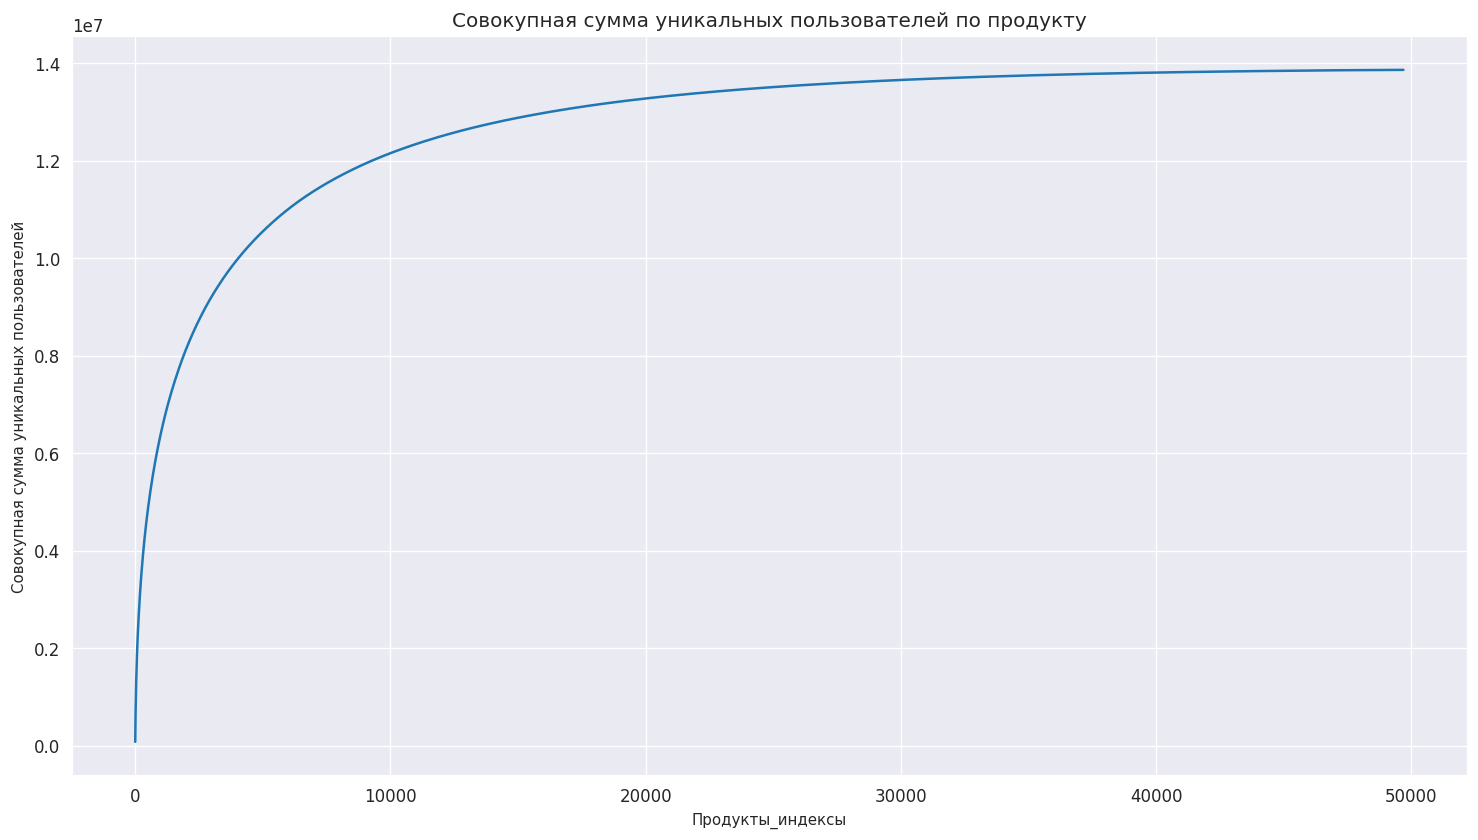

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.lineplot(x = temp_df.index, y=temp_df.cum_users)
ax.set_xlabel("Продукты_индексы", size = 9)
ax.set_ylabel("Совокупная сумма уникальных пользователей", size = 9)
ax.set_title("Совокупная сумма уникальных пользователей по продукту", size = 12)
plt.show()

## Общее количество заказов на продукцию по сравнению с общим количеством уникальных покупателей продукции

In [ ]:
product_unique_users

,product_name,total_users,total,reorders,reorder_ratio
0,#2 Coffee Filters,534,799,265,0.331665
1,#2 Cone White Coffee Filters,11,14,3,0.214286
2,#2 Mechanical Pencils,9,9,0,0.000000
3,#4 Natural Brown Coffee Filters,157,247,90,0.364372
4,& Go! Hazelnut Spread + Pretzel Sticks,81,174,93,0.534483
...,...,...,...,...,...
49680,with Xylitol Unwrapped Original Flavor 50 Stic...,24,41,17,0.414634
49681,with Xylitol Unwrapped Spearmint 50 Sticks Sug...,37,57,20,0.350877
49682,with Xylitol Watermelon Twist 18 Sticks Sugar ...,40,74,34,0.459459
49683,with a Splash of Mango Coconut Water,20,27,7,0.259259


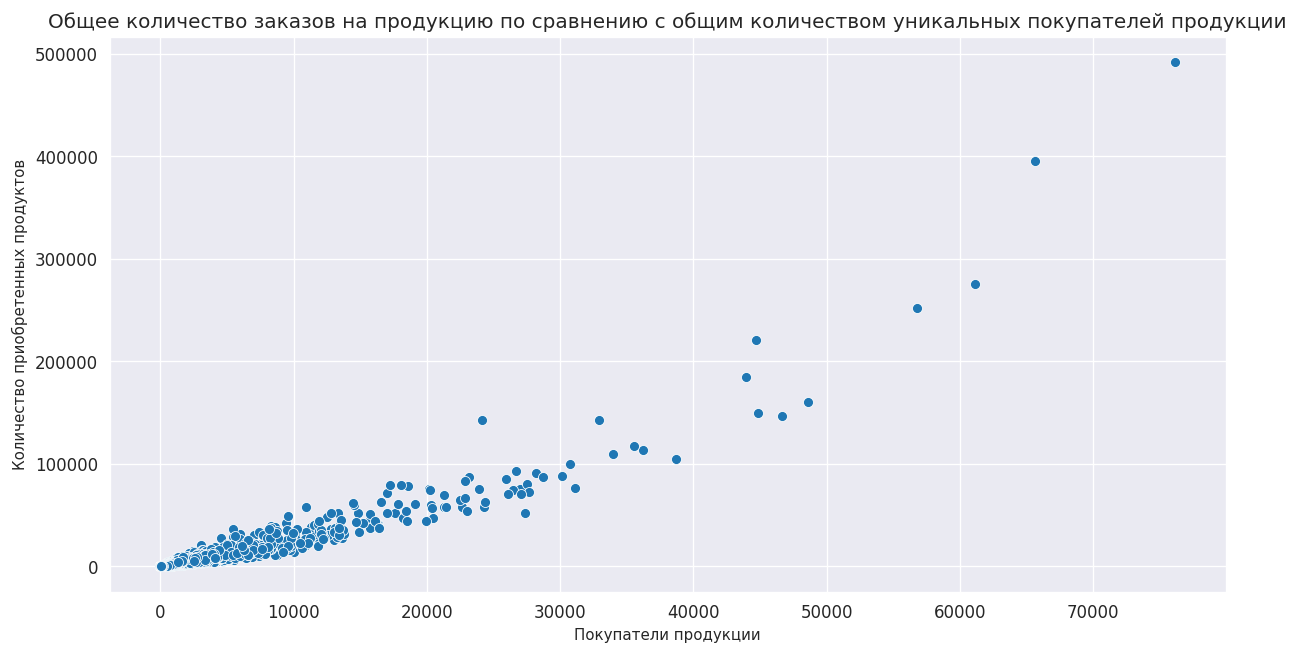

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.scatterplot(y = product_unique_users.total, x = product_unique_users.total_users)
ax.set_xlabel("Покупатели продукции", size = 9)
ax.set_ylabel("Количество приобретенных продуктов", size = 9)
ax.set_title("Общее количество заказов на продукцию по сравнению с общим количеством уникальных покупателей продукции", size = 12)
plt.show()

#### Процент повторных заказов по сравнению с общим количеством заказов

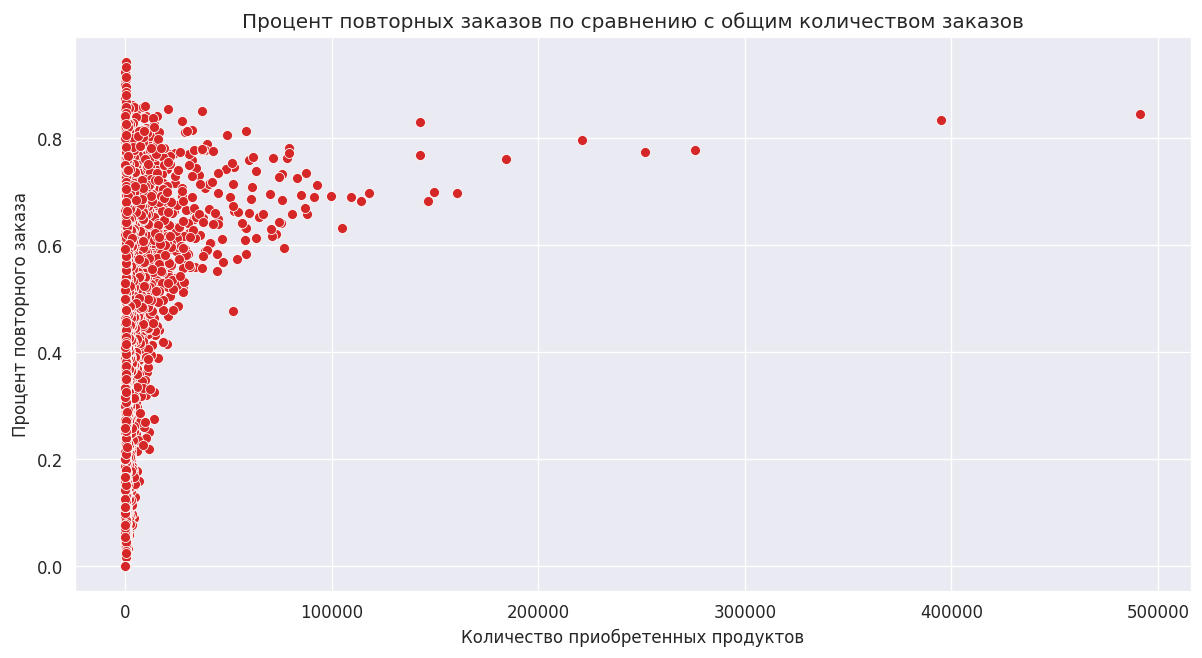

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.scatterplot(x = product_unique_users.total, y = product_unique_users.reorder_ratio, color = color[3])
ax.set_xlabel("Количество приобретенных продуктов")
ax.set_ylabel("Процент повторного заказа")
ax.set_title("Процент повторных заказов по сравнению с общим количеством заказов")
plt.show()

#### Процент повторных заказов и общее количество уникальных пользователей

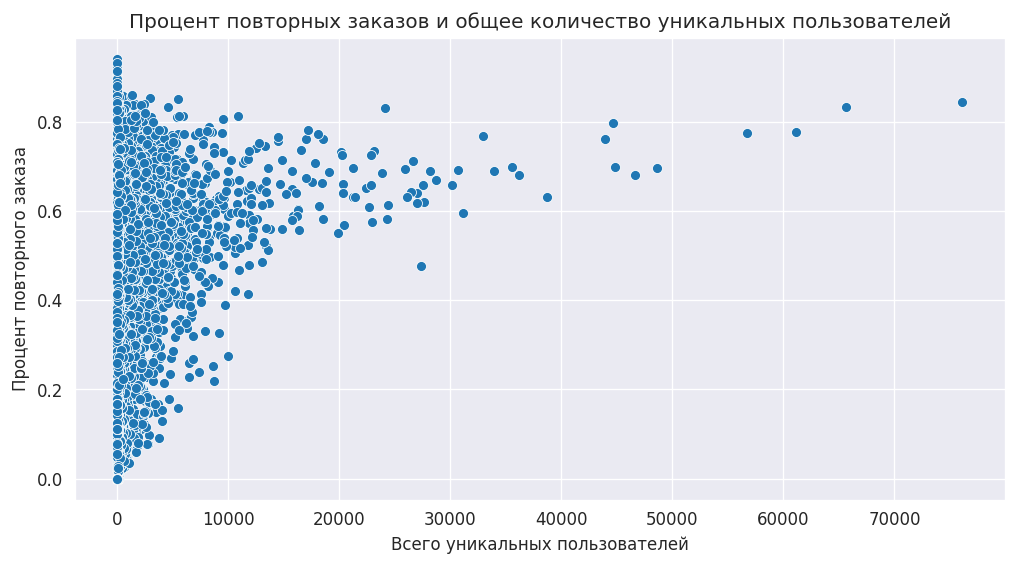

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.scatterplot(x = product_unique_users.total_users, y = product_unique_users.reorder_ratio, color = color[0])
ax.set_xlabel("Всего уникальных пользователей")
ax.set_ylabel("Процент повторного заказа")
ax.set_title("Процент повторных заказов и общее количество уникальных пользователей")
plt.show()

#### Органический против неорганического

In [ ]:
product_unique_users['Organic'] = product_unique_users.product_name.str.contains("Organic")
product_unique_users.head()

,product_name,total_users,total,reorders,reorder_ratio,Organic
0,#2 Coffee Filters,534,799,265,0.331665,False
1,#2 Cone White Coffee Filters,11,14,3,0.214286,False
2,#2 Mechanical Pencils,9,9,0,0.000000,False
3,#4 Natural Brown Coffee Filters,157,247,90,0.364372,False
4,& Go! Hazelnut Spread + Pretzel Sticks,81,174,93,0.534483,False


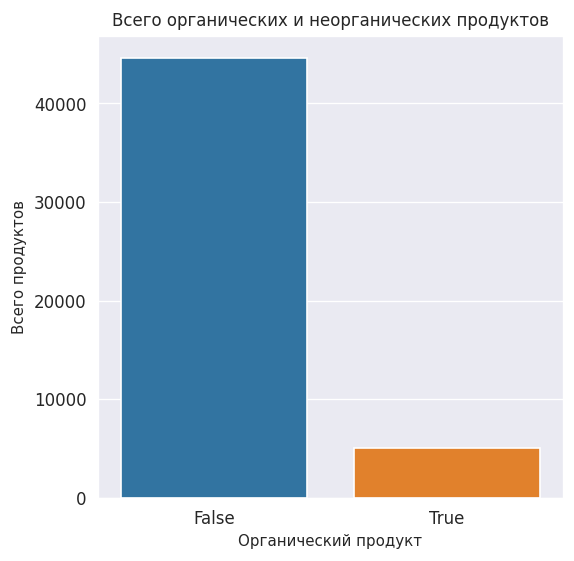

In [ ]:
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.barplot(x = product_unique_users.groupby('Organic').size().index, y = product_unique_users.groupby('Organic').size().values)
ax.set_xlabel("Органический продукт", size = 9)
ax.set_ylabel("Всего продуктов", size = 9)
ax.set_title("Всего органических и неорганических продуктов", size = 10)
plt.show()

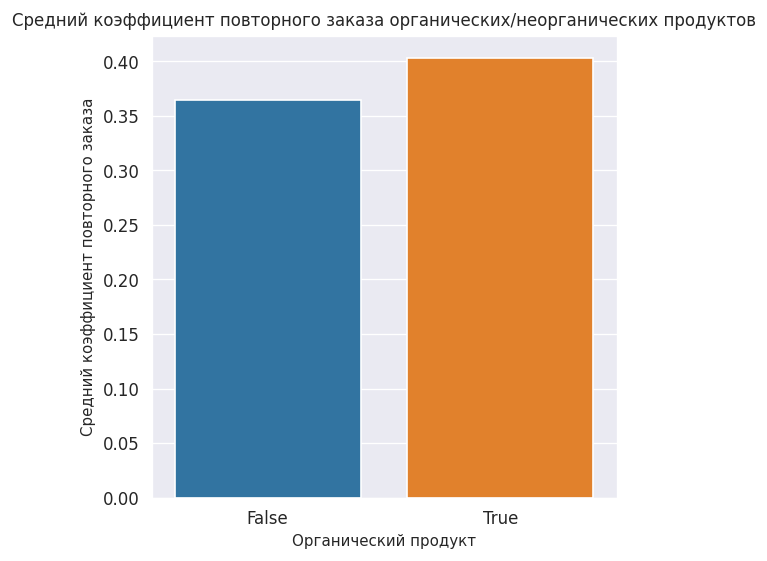

In [ ]:
fig, ax = plt.subplots(figsize = (5,5))
ax = sns.barplot(x = product_unique_users.groupby('Organic')['reorder_ratio'].mean().index, y = product_unique_users.groupby('Organic')['reorder_ratio'].mean().values)
ax.set_xlabel("Органический продукт", size = 9)
ax.set_ylabel("Средний коэффициент повторного заказа", size = 9)
ax.set_title("Средний коэффициент повторного заказа органических/неорганических продуктов", size = 10)
plt.show()

#### Добавление в корзину и Повторные заказы

In [ ]:
temp_df = merged_data.groupby('add_to_cart_order')['reordered'].mean().reset_index()
temp_df.head()

,add_to_cart_order,reordered
0,1,0.679302
1,2,0.677135
2,3,0.658426
3,4,0.637350
4,5,0.617598


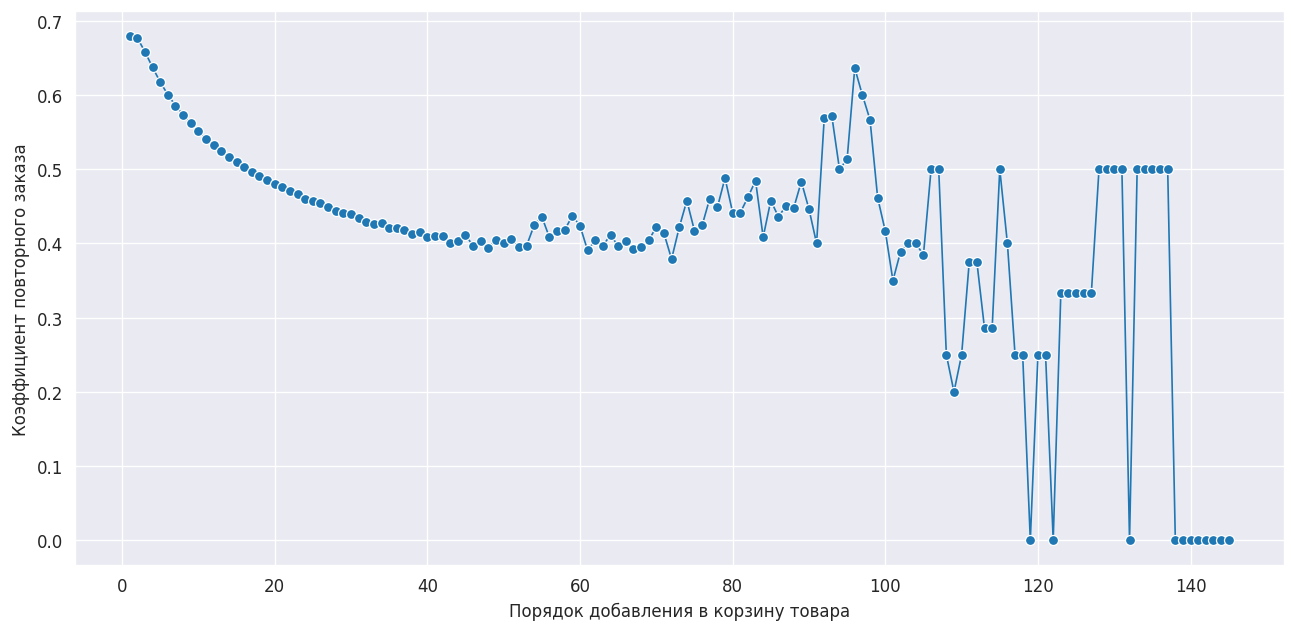

In [ ]:
fig, ax = plt.subplots(figsize=(13,6))
ax = sns.lineplot(x=temp_df.add_to_cart_order, y=temp_df.reordered, lw = 1, marker='o')
ax.set_xlabel("Порядок добавления в корзину товара")
ax.set_ylabel("Коэффициент повторного заказа")
plt.show()

#### Самые популярные товары в разные дни

In [ ]:
temp_df = merged_data.groupby(['order_dow', 'product_name']).size().reset_index(name='counts')
temp_df = temp_df.sort_values(['order_dow', 'counts'], ascending=[True, False])
temp_df = temp_df.groupby('order_dow').head(5).reset_index(drop = True)

Text(0.5, 0.98, 'Самые популярные товары в разные дни недели')

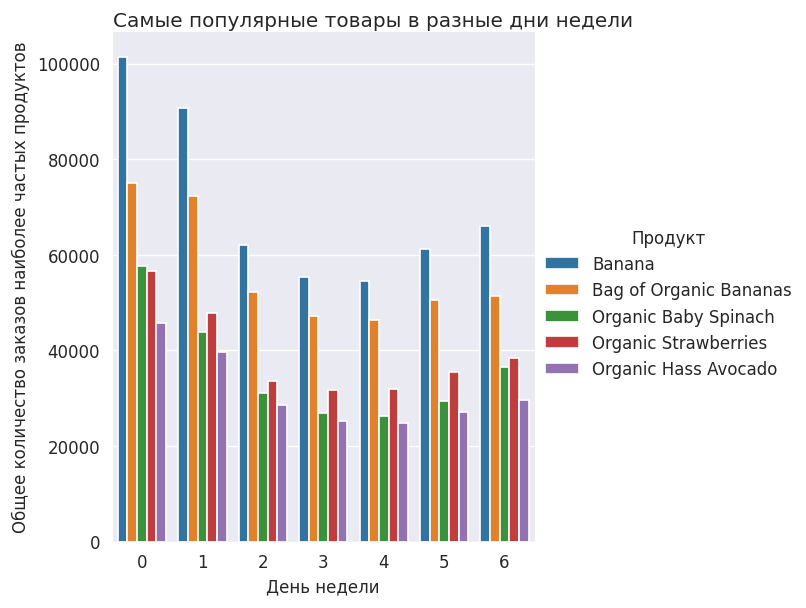

In [ ]:
ax = sns.catplot(x="order_dow", y="counts", hue="product_name", data=temp_df, kind="bar", legend=False)
ax.add_legend(title="Продукт")
ax.set_axis_labels("День недели", "Общее количество заказов наиболее частых продуктов")
ax.fig.suptitle("Самые популярные товары в разные дни недели", va="baseline", ha="center")